# Exploratory Data Analysis

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../data'))
import pathlib
import json
from datetime import datetime

import numpy as np
import pandas as pd
import gensim
import spacy

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading

In [2]:
data_root = pathlib.Path('../data')

In [3]:
all_json_paths = list(data_root.glob('*.json'))
all_json_paths = [str(path) for path in all_json_paths]

In [4]:
all_json_paths

['..\\data\\Kickstarter_2019-01-17T03_20_02_630Z.json',
 '..\\data\\Kickstarter_2019-02-14T03_20_04_734Z.json',
 '..\\data\\Kickstarter_2019-03-14T03_20_12_200Z.json',
 '..\\data\\Kickstarter_2019-04-18T03_20_02_220Z.json',
 '..\\data\\Kickstarter_2019-05-16T03_20_20_822Z.json',
 '..\\data\\Kickstarter_2019-06-13T03_20_35_801Z.json',
 '..\\data\\Kickstarter_2019-07-18T03_20_05_009Z.json',
 '..\\data\\Kickstarter_2019-08-15T03_20_03_022Z.json']

In [5]:
%%time
data = []
for line in open(all_json_paths[0], 'r', encoding='utf8'):
    data.append(json.loads(line))
    
data = [record['data'] for record in data]
df = pd.DataFrame.from_records(data)

Wall time: 22.9 s


In [6]:
df.head()

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,320897621,{'key': 'assets/013/884/141/51d672393d941b28a9...,A Date in 2025 - A sci-fi comedy short film,"In the year 2025, a young man's superintellige...",4000.0,5265.82,successful,a-date-in-2025-a-sci-fi-comedy-short-film,False,US,...,"{'id': 2442047, 'name': 'Los Angeles', 'slug':...","{'id': 32, 'name': 'Shorts', 'slug': 'film & v...","{'id': 2696093, 'project_id': 2696093, 'state'...",True,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
1,1504102568,{'key': 'assets/012/061/827/c4a4d3b58093abe6a7...,Replacement Place | New York Live Arts,Replacement Place needs your support to combat...,5000.0,5225.00,successful,replacement-place-new-york-live-arts,False,US,...,"{'id': 2459115, 'name': 'New York', 'slug': 'n...","{'id': 254, 'name': 'Performances', 'slug': 'd...","{'id': 1755245, 'project_id': 1755245, 'state'...",True,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
2,284827571,{'key': 'assets/018/209/038/4d46d6bed9b83d4e9a...,Pumpkin Spice Love!,Pumpkin Spice Love - A Pumpkin Spice 4 Life 30...,250.0,362.00,successful,pumpkin-spice-love,False,US,...,"{'id': 2406949, 'name': 'Franklin', 'slug': 'f...","{'id': 262, 'name': 'Accessories', 'slug': 'fa...","{'id': 3132385, 'project_id': 3132385, 'state'...",True,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
3,1384659155,{'key': 'assets/012/230/880/ae49c9a5a737288f0f...,Pirate Mama,Single mama and her 4-year old sail with all-f...,15000.0,15678.00,successful,pirate-mama-setting-sail-with-her-little-boy,False,US,...,"{'id': 2356566, 'name': 'Asheville', 'slug': '...","{'id': 13, 'name': 'Journalism', 'slug': 'jour...","{'id': 2079775, 'project_id': 2079775, 'state'...",True,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4,1244590413,{'key': 'assets/014/686/681/f58b7c12e1896e532c...,SparKit - Miniature Electrostatic Generator,SparKit wishes to produce kit-set Wimshurst Ma...,2500.0,11412.00,successful,sparkit-miniature-electrostatic-generator,False,NZ,...,"{'id': 2348327, 'name': 'Christchurch', 'slug'...","{'id': 334, 'name': 'DIY Electronics', 'slug':...","{'id': 2688334, 'project_id': 2688334, 'state'...",True,{'web': {'project': 'https://www.kickstarter.c...,https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


In [7]:
cols = df.columns.to_list()

In [8]:
cols

['id',
 'photo',
 'name',
 'blurb',
 'goal',
 'pledged',
 'state',
 'slug',
 'disable_communication',
 'country',
 'currency',
 'currency_symbol',
 'currency_trailing_code',
 'deadline',
 'state_changed_at',
 'created_at',
 'launched_at',
 'staff_pick',
 'is_starrable',
 'backers_count',
 'static_usd_rate',
 'usd_pledged',
 'converted_pledged_amount',
 'fx_rate',
 'current_currency',
 'usd_type',
 'creator',
 'location',
 'category',
 'profile',
 'spotlight',
 'urls',
 'source_url',
 'friends',
 'is_starred',
 'is_backing',
 'permissions']

# 2. Data Exploration
From a UI perspective, we assume that the user will be utilizing the model before the campaign is launched. From that, we decide to focus on the most important ex ante fields first. That will be `name`, `blurb` (description), `goal` (amount to be raised), `country`, `duration` (campaign duration), `category`. The rest of the fields such as `usd_pledged`, `fx_rate`, `staff_pick`, etc, while relevant, are actually ex post information that user will not know before the campaign is launched.

We will look at the pre-determined ex ante fields one by one to decide what frontend will supply to our model.

## 2.1 `goal` of the campaign, aka how much to raise

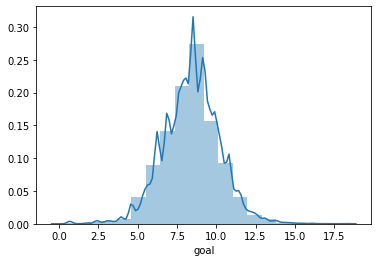

In [9]:
assert df.goal.isnull().any() == False

sns.distplot(np.log1p(df.goal), bins=20)

In [10]:
df.goal

0          4000.0
1          5000.0
2           250.0
3         15000.0
4          2500.0
           ...   
207843    80000.0
207844     4500.0
207845     2000.0
207846     1500.0
207847     3000.0
Name: goal, Length: 207848, dtype: float64

In [11]:
df.goal.describe()

count    2.078480e+05
mean     4.971114e+04
std      1.187729e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

## 2.2 `country` of the campaign
`country` field appears to be using ISO 3166-1 alpha-2 two letter country codes

In [12]:
df.country.unique()

array(['US', 'NZ', 'CA', 'GB', 'SE', 'DK', 'IT', 'DE', 'AU', 'FR', 'IE',
       'CH', 'ES', 'BE', 'NL', 'MX', 'JP', 'HK', 'AT', 'SG', 'NO', 'LU'],
      dtype=object)

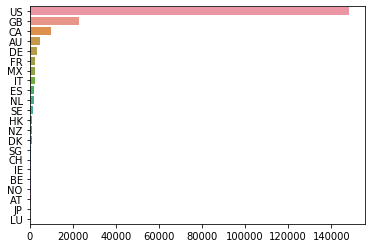

In [13]:
sns.barplot(x = df.country.value_counts().values, y=df.country.value_counts().index);

## 2.3 `duration` of the campaign
Duration is not included as part of the field in the default kickstarter jsons. We would have to inference `duration` from  'deadline', 'state_changed_at', 'created_at', 'launched_at'.

In [14]:
df_times = df[['deadline', 'state_changed_at', 'created_at', 'launched_at']]

In [15]:
df_times.head()

,deadline,state_changed_at,created_at,launched_at
0,1477674323,1477674323,1474949898,1475082323
1,1431748740,1431748742,1425755444,1427920183
2,1506112227,1506112227,1504654576,1504902627
3,1446670945,1446670947,1440164389,1444075345
4,1486790794,1486790794,1474436782,1484198794


In [16]:
# getting the difference between launch and deadline in days and store it as durations
df_times['durations'] = round((df_times.deadline - df_times.launched_at)/(60*60*24))

c:\users\han-chung lee\.virtualenvs\ds-fcjldsbe\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df_times.deadline = df_times.deadline.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
df_times.state_changed_at = df_times.state_changed_at.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
df_times.created_at = df_times.created_at.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
df_times.launched_at = df_times.launched_at.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
df_times.head()

c:\users\han-chung lee\.virtualenvs\ds-fcjldsbe\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,deadline,state_changed_at,created_at,launched_at,durations
0,2016-10-28,2016-10-28,2016-09-26,2016-09-28,30.0
1,2015-05-15,2015-05-15,2015-03-07,2015-04-01,44.0
2,2017-09-22,2017-09-22,2017-09-05,2017-09-08,14.0
3,2015-11-04,2015-11-04,2015-08-21,2015-10-05,30.0
4,2017-02-10,2017-02-10,2016-09-20,2017-01-11,30.0


In [18]:
df_times.durations.value_counts()

30.0    93253
60.0    16687
45.0     8280
31.0     7296
35.0     5416
        ...  
73.0        4
79.0        4
83.0        2
92.0        2
93.0        2
Name: durations, Length: 93, dtype: int64

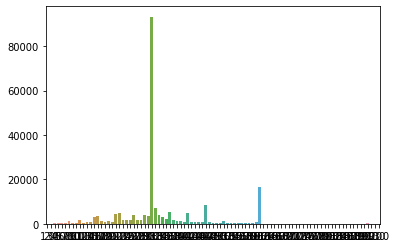

In [19]:
sns.barplot(x = df_times.durations.value_counts().index, y=df_times.durations.value_counts().values);

In [20]:
df_times.durations.describe()

count    207848.000000
mean         32.676802
std          11.812673
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          93.000000
Name: durations, dtype: float64

## 2.4 `category`

`category` field is in json format.

In [21]:
print(df.category[0])

{'id': 32, 'name': 'Shorts', 'slug': 'film & video/shorts', 'position': 16, 'parent_id': 11, 'color': 16734574, 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/film%20&%20video/shorts'}}}


In [22]:
cat_slug = [a['slug'] for a in df.category]
cs = list(set(cat_slug))
cat_list = []
for c in cs:
    cc = c.split('/')[0]
    cat_list.append(cc)    
print(set(cat_list))
cat_list = list(set(cat_list))

{'publishing', 'fashion', 'dance', 'theater', 'design', 'journalism', 'games', 'crafts', 'technology', 'comics', 'photography', 'food', 'film & video', 'art', 'music'}


In [23]:
cat_list

['publishing',
 'fashion',
 'dance',
 'theater',
 'design',
 'journalism',
 'games',
 'crafts',
 'technology',
 'comics',
 'photography',
 'food',
 'film & video',
 'art',
 'music']

In [24]:
df['cat_slug'] = df.category.apply(lambda x: x['slug'].split('/')[0])#[0]['slug']

In [25]:
df.cat_slug.head(10)

0    film & video
1           dance
2         fashion
3      journalism
4      technology
5      journalism
6             art
7      journalism
8          crafts
9             art
Name: cat_slug, dtype: object

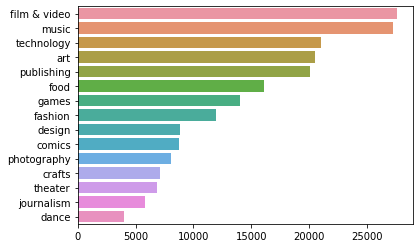

In [26]:
sns.barplot(x = df.cat_slug.value_counts().values, y=df.cat_slug.value_counts().index);

## 2.5 Training target `state`

This is the target for which our model will be inferencing. `state` can be 'successful', 'failed', 'canceled', 'live', and 'suspended'.  Since our service will be doing ex ante inferencing, we will have to remove any campaign that is 'live', and we will consider 'canceled' and 'suspended' as 'failed'.  Judging from the plots below, the inference targets is not too inbalanced.

In [27]:
df.state.unique()

array(['successful', 'failed', 'canceled', 'live', 'suspended'],
      dtype=object)

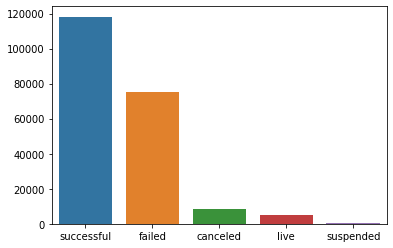

In [28]:
sns.barplot(x = df.state.value_counts().index, y=df.state.value_counts().values);

# 3. Text Data Transformation

There are two ways to tackle `name` and `blurb` text fields. First, we can train two separate supervised learning regression models that maps from preprocessed text to the `state` of the campaign, with successful being 1 and failed being 0. Those two models would then output a value with respect to the state of the campaign. We would then be able to use those values in the overall model with the other features to make an inference. This, in our opinion, will take significant amount of time to train.

The proposed way, is to transform both `name` and `blurb` into a feature vector using word2vec (or in this case, doc2vec) deep learning NLP model. The gensim library has pre-built word2vec, sentence2vec, and doc2vec models. So, instead of building our own model to output some score, we choose to first experiment with gensim's build-in functionalities to shorten the research time.